# Stimulus Figures

In [2]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
font_size = 14
hatches = ['\\\\', '//','x','\\','/','||','+','o','O','-','.','|']
line_markers = ['o', 's', '^','v']
io_color = '#91ACDF'
comp_color = '#98A255'
read_color = '#98A255'
write_color = '#E77D8D'
read_color = '#C69156'
other_colors = ['#F5871F','#5A5B5D','#B6D442','#FCFB47','#111F71']
dpi = 2000
marker_size = 7
bar_width = .35
save_dir = "./"

In [4]:
procs=[512,1024,2048,4096,8192]
computation=[216,108,54,27,13.5]
ideal_comp=computation
io=[1830,1189.5,773.175,502.56375,326.6664375]
ideal_io=[1744,872,436,218,69]
data = {'procs': procs, 'computation': computation, 'ideal_comp': ideal_comp, 'io':io, 'ideal_io':ideal_io}
df = pd.DataFrame(data)

In [5]:

df['total'] = df['computation'] + df['io']
df['total_ideal'] = df['ideal_comp'] + df['ideal_io']

In [6]:
df['total_err'] = df['total'] * 0.023
df['io_err'] = df['io'] * 0.023
df['computation_err'] = df['computation'] * 0.053

In [7]:
print(df)

   procs  computation  ideal_comp           io  ideal_io        total  \
0    512        216.0       216.0  1830.000000      1744  2046.000000   
1   1024        108.0       108.0  1189.500000       872  1297.500000   
2   2048         54.0        54.0   773.175000       436   827.175000   
3   4096         27.0        27.0   502.563750       218   529.563750   
4   8192         13.5        13.5   326.666437        69   340.166437   

   total_ideal  total_err     io_err  computation_err  
0       1960.0  47.058000  42.090000          11.4480  
1        980.0  29.842500  27.358500           5.7240  
2        490.0  19.025025  17.783025           2.8620  
3        245.0  12.179966  11.558966           1.4310  
4         82.5   7.823828   7.513328           0.7155  


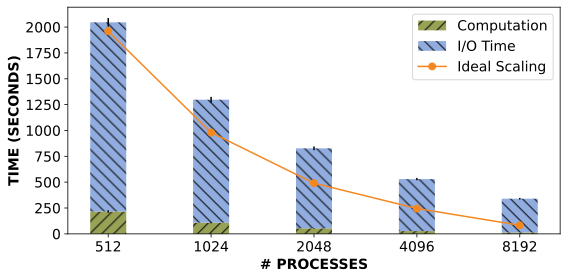

In [8]:
#Plot 1 - background - "total" (top) series
plt.figure(figsize=(8,4))
comp_plot = plt.bar(df['procs'].astype(str), df['computation'], yerr=df['computation_err'], width=bar_width, color=comp_color, hatch=hatches[1])
io_plot = plt.bar(df['procs'].astype(str), df['io'], yerr=df['io_err'], bottom=df['computation'], width=bar_width, color=io_color, hatch=hatches[0])
ideal_plot = plt.plot(df['procs'].astype(str), df['total_ideal'], color=other_colors[0], marker=line_markers[0], markersize=marker_size)

#legend
# topbar = plt.Rectangle((0,0),1,1,fc=io_color, hatch=hatches[0])
# bottombar = plt.Rectangle((0,0),1,1,fc=comp_color, hatch=hatches[1])
# l = plt.legend([bottombar, topbar], ['Computation', 'I/O Time'], loc=1, ncol = 1, prop={'size':font_size})
# l.draw_frame(False)

plt.legend((comp_plot[0], io_plot[0], ideal_plot[0]), ("Computation", "I/O Time", "Ideal Scaling"), fontsize=font_size)

#Optional code - Make plot look nicer
plt.ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xlabel("# PROCESSES", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# #Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(font_size)
plt.tight_layout()
plt.savefig(save_dir + "motivation.pdf", format='pdf',dpi=dpi)

In [9]:
!pdfcrop "{save_dir}motivation.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `./motivation-crop.pdf'.


## Anatomy

In [10]:
labels = ['HDF5Dataset:I/O','HDF5Dataset:Sample','HDF5Dataset:Converter', 'interleave (resize)', 'map (zoom)', 'filter', 'shuffle', 'batch', 'prefetch', 'Iteration']
values = [0.426666667,0.170666667,0.085333333,0.316923077,0.307692308,0.158461538,0.153846154,0.02403846,0.682666667,0.02884615]
data = {'labels': labels, 'values': values}
df = pd.DataFrame(data)
df["percentage"] = df["values"] *100 / df["values"].sum()
df["percentage"] = df["percentage"].round(1)
df["concat"] = df["labels"] + " " + df["percentage"].astype(str) + "%"
print(df)

                  labels    values  percentage                      concat
0        HDF5Dataset:I/O  0.426667        18.1       HDF5Dataset:I/O 18.1%
1     HDF5Dataset:Sample  0.170667         7.2     HDF5Dataset:Sample 7.2%
2  HDF5Dataset:Converter  0.085333         3.6  HDF5Dataset:Converter 3.6%
3    interleave (resize)  0.316923        13.5   interleave (resize) 13.5%
4             map (zoom)  0.307692        13.1            map (zoom) 13.1%
5                 filter  0.158462         6.7                 filter 6.7%
6                shuffle  0.153846         6.5                shuffle 6.5%
7                  batch  0.024038         1.0                  batch 1.0%
8               prefetch  0.682667        29.0              prefetch 29.0%
9              Iteration  0.028846         1.2              Iteration 1.2%


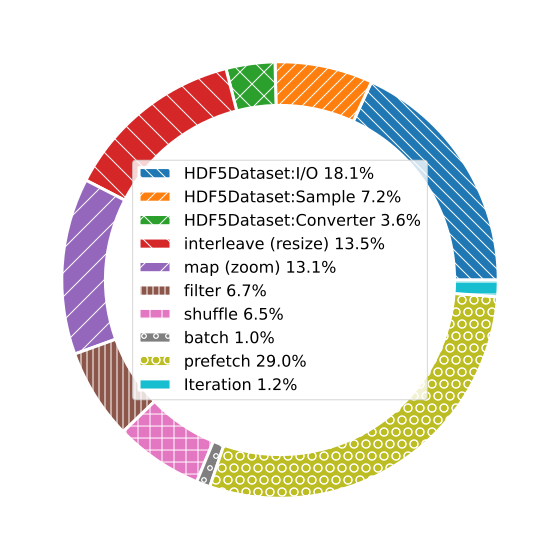

In [11]:
plt.figure(figsize=(8,8))
matplotlib.rcParams['font.size'] = font_size
pie_chart = plt.pie(df['values'], startangle=0, radius=1,wedgeprops=dict(width=0.2, edgecolor='w',linewidth=3))
for i, patch in enumerate(pie_chart[0]):
    patch.set_hatch(hatches[i])
plt.legend(pie_chart[0], df["concat"],
          loc="center",
           fontsize=font_size+2,
          bbox_to_anchor=(.5,.5))
plt.tight_layout()
plt.savefig(save_dir + "anatomy.pdf", format='pdf',dpi=dpi)

In [12]:
!pdfcrop "{save_dir}/anatomy.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//anatomy-crop.pdf'.


## IPG Performance

In [45]:
vertices=[1,4,16,64]
io=[1366120.219,1821493.625,2732240.437,5464480.874]
sample=[10775862.07,14367816.09,21551724.14,43103448.28]
convert=[10469116.94,13958822.59,20938233.89,41876467.77]
data = {'vertices': vertices, 'io': io, 'sample': sample, 'convert':convert}
df = pd.DataFrame(data)

In [46]:
df['io'] = df['io'] / 1000000.0;
df['sample'] = df['sample'] / 1000000.0;
df['convert'] = df['convert'] / 1000000.0;

In [47]:
df['io_err'] = df['io'] * 0.023
df['sample_err'] = df['sample'] * 0.053
df['convert_err'] = df['convert'] * 0.013

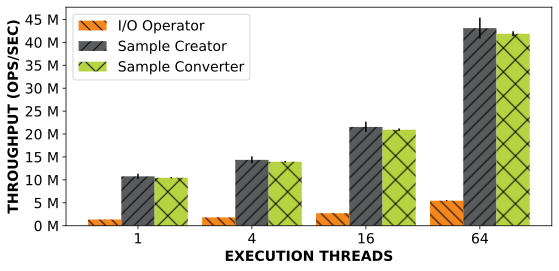

In [48]:
fig, ax = plt.subplots(figsize=(8,4))
x = np.arange(len(df['vertices']))
x = x * 1.2
p1 = ax.bar(x - bar_width, df['io'], yerr=df['io_err'], width=bar_width, color=other_colors[0], hatch=hatches[0])
p2 = ax.bar(x , df['sample'], yerr=df['sample_err'], width=bar_width, color=other_colors[1], hatch=hatches[1])
p3 = ax.bar(x + bar_width, df['convert'], yerr=df['convert_err'], width=bar_width, color=other_colors[2], hatch=hatches[2])
ax.set_xticks(x)
ax.set_xticklabels(df['vertices'].astype(str))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.0f M'))

plt.legend((p1[0], p2[0], p3[0]), ("I/O Operator", "Sample Creator", "Sample Converter"), fontsize=font_size)


plt.ylabel("THROUGHPUT (OPS/SEC)", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xlabel("EXECUTION THREADS", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "ipg_performance.pdf", format='pdf',dpi=dpi)

In [49]:
!pdfcrop "{save_dir}/ipg_performance.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//ipg_performance-crop.pdf'.


## Transfer Size

In [140]:
request_size=['4K','8K','16K','32K','64K','128K','256K','512K','1M','2M','4M','8M','16M','32M']
io_time=[86.88370585,87.20983839,89.65340447,88.61275601,87.75824928,84.24629712,86.55392551,91.37065291,45.16805959,45.08105874,43.42370081,41.68120599,42.62644696,43.98010683]
bw=[1.3487857,1.34374174,1.307117122,1.322467614,1.335344551,1.391010691,1.353924727,1.282550756,2.594477183,2.599484202,2.698699047,2.811518938,2.749173538,2.664556966]
new_request_size = []
new_io_time = []
new_bw = []
mark = 2
for i in range(len(request_size)):
    if i % mark == 0:
        new_request_size.append(request_size[i])
        new_io_time.append(io_time[i])
        new_bw.append(bw[i])
data = {'request_size': new_request_size, 'io_time': new_io_time, 'bw': new_bw}
df = pd.DataFrame(data)

In [141]:
df['io_time_err'] = df['io_time'] * 0.014

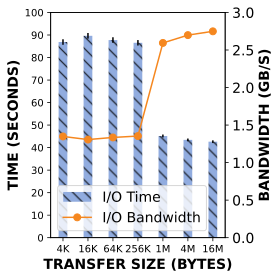

In [144]:
fig, ax1 = plt.subplots(figsize=(4,4))
p1 = ax1.bar(df['request_size'], df['io_time'], yerr=df['io_time_err'], width=bar_width, color=io_color, hatch=hatches[0])
ax2 = ax1.twinx()
p2 = ax2.plot(df['request_size'], df['bw'], color=other_colors[0], marker=line_markers[0], markersize=marker_size)

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.set_ylim([0,100])
ax2.set_ylim([0,3])
plt.legend((p1[0], p2[0]), ("I/O Time", "I/O Bandwidth"), fontsize=font_size)


ax1.set_ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax2.set_ylabel("BANDWIDTH (GB/S)", fontdict=dict(weight='bold'), fontsize=font_size)
ax1.set_xlabel("TRANSFER SIZE (BYTES)", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "transfer_size.pdf", format='pdf',dpi=dpi)

In [145]:
!pdfcrop "{save_dir}/transfer_size.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//transfer_size-crop.pdf'.


## Overlap of Computation and I/O

In [22]:
percentage_overlap = ['0%','25%','50%','75%','100%']
computation = [0,5.2065261,10.4130522,15.6195783,20.8261044]
unoverlaped_io = [20.8261044,15.29941323,9.19266468,4.6101044,0.951769936]
data = {'percentage_overlap': percentage_overlap, 'computation': computation, 'unoverlaped_io': unoverlaped_io}
df = pd.DataFrame(data)

In [23]:
df['computation_err'] = df['computation'] * 0.010
df['unoverlaped_io_err'] = df['unoverlaped_io'] * 0.032

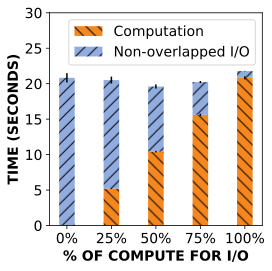

In [24]:
fig, ax1 = plt.subplots(figsize=(4,4))
p1 = ax1.bar(df['percentage_overlap'], df['computation'], yerr=df['computation_err'], width=bar_width, color=other_colors[0], hatch=hatches[0])
p2 = ax1.bar(df['percentage_overlap'], df['unoverlaped_io'], yerr=df['unoverlaped_io_err'], bottom=df['computation'], width=bar_width, color=io_color, hatch=hatches[1])
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.set_ylim([0,30])

plt.legend((p1[0], p2[0]), ("Computation", "Non-overlapped I/O"), fontsize=font_size)
ax1.set_ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax1.set_xlabel("% OF COMPUTE FOR I/O", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "overlap.pdf", format='pdf',dpi=dpi)

In [25]:
!pdfcrop "{save_dir}/overlap.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//overlap-crop.pdf'.


## Read Threads

In [152]:
threads = ['None','1','2','4','8','16','32']
io_time = [77.44561481,57.3272779,33.18066049,21.24041867,22.53202415,35.14562488,53.612432]
data = {'threads': threads, 'io_time': io_time}
df = pd.DataFrame(data)

In [153]:
df['io_time_err'] = df['io_time'] * 0.022

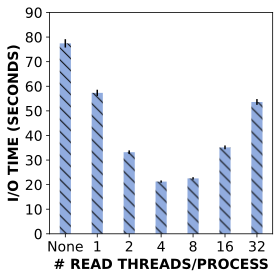

In [158]:
fig, ax1 = plt.subplots(figsize=(4,4))
p1 = ax1.bar(df['threads'], df['io_time'], yerr=df['io_time_err'], width=bar_width, color=io_color, hatch=hatches[0])

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.set_ylim([0,90])

ax1.set_ylabel("I/O TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax1.set_xlabel("# READ THREADS/PROCESS", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "read_threads.pdf", format='pdf',dpi=dpi)

In [159]:
!pdfcrop "{save_dir}/read_threads.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//read_threads-crop.pdf'.


## Computation Threads

In [160]:
threads = ['None','1','2','4','8','16','32']
preprocess = [78.28509521,76.23521376,31.48051691,18.61890721,19.24470401,20.58463168,19.98573089]
data = {'threads': threads, 'preprocess': preprocess}
df = pd.DataFrame(data)

In [162]:
df['preprocess_err'] = df['preprocess'] * 0.021

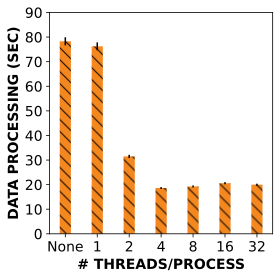

In [164]:
fig, ax1 = plt.subplots(figsize=(4,4))
p1 = ax1.bar(df['threads'], df['preprocess'], yerr=df['preprocess_err'], width=bar_width, color=other_colors[0], hatch=hatches[0])

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.set_ylim([0,90])

ax1.set_ylabel("DATA PROCESSING (SEC)", fontdict=dict(weight='bold'), fontsize=font_size)
ax1.set_xlabel("# THREADS/PROCESS", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "comp_threads.pdf", format='pdf',dpi=dpi)

In [165]:
!pdfcrop "{save_dir}/comp_threads.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//comp_threads-crop.pdf'.


## PREFETCHING

In [166]:
prefetching_cache = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
computation = [14.29,15.64755,15.61897,14.97592,14.69012,15.06166,15.26172,14.8616,15.07595,15.36175,14.56151]
io = [34.29,29.66262976,20.47164179,17.91268657,15.35373134,12.79477612,10.2358209,7.676865672,7.692219403,7.676834964,7.692188634]
data = {'prefetching_cache': prefetching_cache, 'computation': computation, 'io': io}
df = pd.DataFrame(data)

In [167]:
df['computation_err'] = df['computation'] * 0.010
df['io_err'] = df['io'] * 0.032

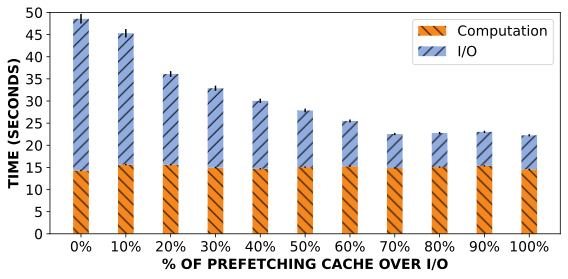

In [170]:
fig, ax1 = plt.subplots(figsize=(8,4))
p1 = ax1.bar(df['prefetching_cache'], df['computation'], yerr=df['computation_err'], width=bar_width, color=other_colors[0], hatch=hatches[0])
p2 = ax1.bar(df['prefetching_cache'], df['io'], yerr=df['io_err'], bottom=df['computation'], width=bar_width, color=io_color, hatch=hatches[1])
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.set_ylim([0,50])

plt.legend((p1[0], p2[0]), ("Computation", "I/O"), fontsize=font_size)
ax1.set_ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax1.set_xlabel("% OF PREFETCHING CACHE OVER I/O", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig(save_dir + "prefetch.pdf", format='pdf',dpi=dpi)

In [171]:
!pdfcrop "{save_dir}/prefetch.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//prefetch-crop.pdf'.


## REAL Apps COSMIC Tagger

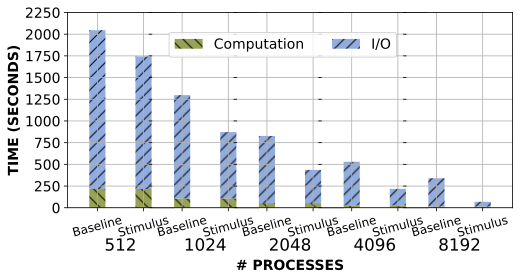

In [53]:
procs=['512','1024','2048','4096','8192']
computation=[[216,108,54,27,13.5],
             [216,108,54,27,13.5]]
io=[[1830,1189.5,773.175,502.56375,326.6664375],
    [1528,764,382,191,55,25]]


colors = [comp_color, io_color] 
c_hatches = [hatches[0],hatches[1]]
labels = ['Computation', 'I/O'] 
ind = [0,1]
f, ax = plt.subplots(1, 5, sharey=True, sharex=True,figsize=(8,4))
f.subplots_adjust(bottom=0.2,wspace=-.2) #make room for the legend
xtics_labels = ['Baseline', 'Stimulus']
plt.xticks(ind, xtics_labels,fontsize=font_size) 
p = [] # list of bar properties 
def create_subplot(matrix, colors, hatches, axis, title, index, total): 
    bar_renderers = [] 
    ind = np.arange(matrix.shape[1]) 
    bottoms = np.cumsum(np.vstack((np.zeros(matrix.shape[1]), matrix)), axis=0)[:-1] 
    for i, row in enumerate(matrix): 
        r = axis.bar(ind, row, width=bar_width, color=colors[i], bottom=bottoms[i], hatch=hatches[i]) 
        bar_renderers.append(r)
    
    axis.set_title(title, y=-0.25)
    axis.margins(bar_width)
    axis.grid()
    axis.set_xticklabels(xtics_labels, rotation=15, fontsize=12)
    if index == 0:
        axis.yaxis.set_major_locator(MultipleLocator(250))
        axis.set_ylim([0,2250])
    elif index == total - 1:
        axis.spines["left"].set_visible(False)
        #axis.set_yticks([])
    else:
        axis.spines["left"].set_visible(False)
        #axis.set_yticks([])
    return bar_renderers


for i, proc in enumerate(procs):
    
    c = np.array([[computation[0][i],computation[1][i] ], 
                [io[0][i], io[1][i]]])
    p.extend(create_subplot(c, colors, c_hatches, ax[i], proc,i,len(procs))) 


ax[0].set_ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax[math.floor(len(procs)/2)].set_xlabel("# PROCESSES", fontdict=dict(weight='bold'), fontsize=font_size,labelpad=20)
f.legend(((x[0] for x in p)), # bar properties 
         (labels),  
         bbox_to_anchor=(0.5, 0.7),  
         loc='lower center', 
         ncol=5,fontsize=font_size)


#plt.tight_layout()
plt.savefig(save_dir + "real_cosmic.pdf", format='pdf',dpi=dpi)

In [54]:
!pdfcrop "{save_dir}/real_cosmic.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//real_cosmic-crop.pdf'.


## Real App: FFN

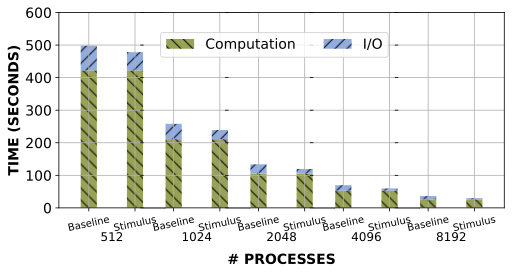

In [63]:
procs=['512','1024','2048','4096','8192']
computation=[[422.2222222,211.1111111,105.5555556,52.77777778,26.38888889],
             [422.2222222,211.1111111,105.5555556,52.77777778,26.38888889]]

io=[[76,47,28.2,16.92,10.152],
    [56,28,14,7,3.5]]


colors = [comp_color, io_color] 
c_hatches = [hatches[0],hatches[1]]
labels = ['Computation', 'I/O'] 
ind = [0,1]
f, ax = plt.subplots(1, 5, sharey=True, sharex=True,figsize=(8,4))
f.subplots_adjust(bottom=0.2,wspace=-.2) #make room for the legend
xtics_labels = ['Baseline', 'Stimulus']
plt.xticks(ind, xtics_labels,fontsize=font_size) 
p = [] # list of bar properties 
def create_subplot(matrix, colors, hatches, axis, title, index, total): 
    bar_renderers = [] 
    ind = np.arange(matrix.shape[1]) 
    bottoms = np.cumsum(np.vstack((np.zeros(matrix.shape[1]), matrix)), axis=0)[:-1] 
    for i, row in enumerate(matrix): 
        r = axis.bar(ind, row, width=bar_width, color=colors[i], bottom=bottoms[i], hatch=hatches[i]) 
        bar_renderers.append(r)
    
    axis.set_title(title, y=-0.20, fontsize=12)
    axis.margins(bar_width)
    axis.grid()
    axis.set_xticklabels(xtics_labels, rotation=12, fontsize=10)
    if index == 0:
        axis.yaxis.set_major_locator(MultipleLocator(100))
        axis.set_ylim([0,600])
    elif index == total - 1:
        axis.spines["left"].set_visible(False)
        #axis.set_yticks([])
    else:
        axis.spines["left"].set_visible(False)
        #axis.set_yticks([])
    return bar_renderers


for i, proc in enumerate(procs):
    
    c = np.array([[computation[0][i],computation[1][i] ], 
                [io[0][i], io[1][i]]])
    p.extend(create_subplot(c, colors, c_hatches, ax[i], proc,i,len(procs))) 


ax[0].set_ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
ax[math.floor(len(procs)/2)].set_xlabel("# PROCESSES", fontdict=dict(weight='bold'), fontsize=font_size,labelpad=20)
f.legend(((x[0] for x in p)), # bar properties 
         (labels),  
         bbox_to_anchor=(0.5, 0.7),  
         loc='lower center', 
         ncol=5,fontsize=font_size)


#plt.tight_layout()
plt.savefig(save_dir + "real_ffn.pdf", format='pdf',dpi=dpi)

In [64]:
!pdfcrop "{save_dir}/real_ffn.pdf"

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `.//real_ffn-crop.pdf'.


In [26]:
34.29/7.676865672

4.428890832883653

In [28]:
34.29/10.23

3.351906158357771